# University ranks

## Introduction

The goal of this work is to answer the following questions:

* How  do  university  rankings  change  over  time?
* Which  characteristics  of  universities  contribute most to good rankings, or to large changes in the ranking position?
* How do these characteristics correlate with characteristics of cities or countries in which the university islocated?
* Are there predictors for increases or decreases in the rankings?

In the course of this work, these questions will be refined and precised before being answered.

The work is devided in three parts, which correspond to the steps in the data science process. First, we will load all necessary data. This includes also data cleaning. Then the data will be explored using plots and calculating descriptive statistics. The third step will be to model the data using ML models.

Before starting, we need to load the needed packages for data processing and visualisation:

In [14]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 15

import glob
import matplotlib.pyplot as plt
import seaborn as sb

## Step 1: Load the data

We load the CWUR data and the Shanghai data. They are available at https://www.kaggle.com/mylesoneill/world-university-rankings. For the Shanghai data the respective countries of the universities have to be merged.

In [2]:
# read the data
datapath = "data/university_data/"

cwur = pd.read_csv(datapath + "/cwurData.csv", header=0)
cwur.set_index(["year", "institution"], inplace=True)

country_dict = {"USA" : "United States of America",
                "Slovak Republic" : "Slovakia"}
for key, value in country_dict.items():
    cwur.replace(key, value, inplace=True)

display(cwur)

world_rank  \
year institution                                         
2012 Harvard University                              1   
     Massachusetts Institute of Technology           2   
     Stanford University                             3   
     University of Cambridge                         4   
     California Institute of Technology              5   
     Princeton University                            6   
     University of Oxford                            7   
...                                                ...   
2015 Ryerson University                            994   
     King Abdulaziz University                     995   
     University of the Algarve                     996   
     Alexandria University                         997   
     Federal University of Ceará                   998   
     University of A Coruña                        999   
     China Pharmaceutical University              1000   

                                                             country  \
year institution                                                       
2012 Harvard University                     United States of America   
     Massachusetts Institute of Technology  United States of America   
     Stanford University                    United States of America   
     University of Cambridge                          United Kingdom   
     California Institute of Technology     United States of America   
     Princeton University                   United States of America   
     University of Oxford                             United Kingdom   
...                                                              ...   
2015 Ryerson University                                       Canada   
     King Abdulaziz University                          Saudi Arabia   
     University of the Algarve                              Portugal   
     Alexandria University                                     Egypt   
     Federal University of Ceará                              Brazil   
     University of A Coruña                                    Spain   
     China Pharmaceutical University                           China   

                                            national_rank  \
year institution                                            
2012 Harvard University                                 1   
     Massachusetts Institute of Technology              2   
     Stanford University                                3   
     University of Cambridge                            1   
     California Institute of Technology                 4   
     Princeton University                               5   
     University of Oxford                               2   
...                                                   ...   
2015 Ryerson University                                33   
     King Abdulaziz University                          4   
     University of the Algarve                          7   
     Alexandria University                              4   
     Federal University of Ceará                       18   
     University of A Coruña                            40   
     China Pharmaceutical University                   83   

                                            quality_of_education  \
year institution                                                   
2012 Harvard University                                        7   
     Massachusetts Institute of Technology                     9   
     Stanford University                                      17   
     University of Cambridge                                  10   
     California Institute of Technology                        2   
     Princeton University                                      8   
     University of Oxford                                     13   
...                                                          ...   
2015 Ryerson University                                      367   
     King Abdulaziz University                

In [3]:
shanghai = pd.read_csv(datapath + "/shanghaiData.csv", header=0)
uni2country = pd.read_csv(datapath + "/school_and_country_table.csv", header=0)
shanghai = shanghai.merge(uni2country, left_on = "university_name", right_on = "school_name")
del shanghai['school_name']
shanghai.set_index("year",inplace=True)
display(shanghai)

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,country
year,,,,,,,,,,,
2005,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,United States of America
2006,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,73.6,United States of America
2007,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,73.0,United States of America
2008,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,74.1,United States of America
2009,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,74.8,United States of America
2010,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,69.2,United States of America
2011,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,70.5,United States of America
...,...,...,...,...,...,...,...,...,...,...,...
2015,201-300,KTH Royal Institute of Technology,6-7,NaN,0.0,14.9,3.6,10.3,38.3,24.2,Sweden


Next we check whether there are any missing values in the data and clean the data accordingly.

In [4]:
pass

# do we need this?
"""
educ_attainment = pd.read_csv(datapath + "/educational_attainment_supplementary_data.csv", header=0)
timesData = pd.read_csv(datapath + "/timesData.csv", header=0)

display(educ_attainment)
display(timesData)
"""


#check missing values in cwur data
print('CWUR values')

print(cwur.isnull().values.any())
print(cwur.isnull().sum())

print('-----------------------')
#check missing values in cwur data
print('SHANGHAI values')
print(shanghai.isnull().values.any())
print(shanghai.isnull().sum())

CWUR values
True
world_rank                0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
dtype: int64
-----------------------
SHANGHAI values
True
world_rank            0
university_name       0
national_rank         0
total_score        2299
alumni                0
award                 1
hici                  1
ns                   12
pub                   1
pcp                   1
country               0
dtype: int64


One goal is to investigate whether and how expenditure for education affects university ranks. For this we need to load the relevant data (which is also available via the above kaggle repository).

This dataset has to be extensively reformatted before working with it, as we need the different years as values in a year column and the different kinds of expenditures should show up in different rows. This is done by the code below. The file was first cleaned manually by deleting the initial spaces of several rows. Furthermore some country names have to be replaced in order to be able to match the country names with the Shanghai ranking

In [5]:
# read the data
educ_expenditure = pd.read_csv(datapath + "/education_expenditure_supplementary_data.csv",
                               header=0,
                               quotechar="\"")

# replace the country names by the above names
country_dict = {"Korea, Republic of" : "South Korea",
                "Russian Federation" : "Russia",
                "United States" : "United States of America",
                "Slovak Republic" : "Slovakia"}
for key, value in country_dict.items():
    educ_expenditure.replace(key, value, inplace=True)

# clean the columns by stripping the string
educ_expenditure["institute_type"]=educ_expenditure["institute_type"].str.strip()


# reformat the dataframe
# first we make a row for each year value and add a year column
years = [1995,2000,2005,2009,2010,2011]

concat_list = []
for year in years:
    cols = ["country","institute_type","direct_expenditure_type", str(year)]
    concat_df = educ_expenditure.copy()[cols]
    concat_df["year"]=year
    concat_df.rename(columns = {str(year) : "percentage of GDP"}, inplace=True)
    concat_list.append(concat_df)

educ_expenditure_processed = pd.concat(concat_list, axis=0, ignore_index=True, sort=False)


# now we transform the values of "institute type" and "direct_expenditure_type" into columns
# so that we obtain a column for each value of "institute_type" and "direct_expenditure_type"
institute_types = set(educ_expenditure_processed["institute_type"])
direct_expenditure_types = set(educ_expenditure_processed["direct_expenditure_type"])

merge_list = []
for institute_type in institute_types:
    for direct_expenditure_type in direct_expenditure_types:
        if direct_expenditure_type == "Public":
            # extract the data with the corresponding "institute_type" and "direct_expenditure_type"

            merge_df =educ_expenditure_processed[(educ_expenditure_processed["institute_type"]==institute_type) & 
                                       (educ_expenditure_processed["direct_expenditure_type"]==direct_expenditure_type)].copy()
            merge_df = merge_df[["country", "year", "percentage of GDP"]]
            merge_df.rename(columns = {"percentage of GDP": "percentage of GDP," + institute_type + " (public)"},
                           inplace=True)
            merge_list.append(merge_df)
            # and store the data separatly

# the data for every single "institute_type" and "direct_expenditure_type" is merged
for merge_df in merge_list[1:]:
    merge_list[0]=merge_list[0].merge(merge_df, on = ["country", "year"])

# take the merged data and set index and multicolumn
educ_expenditure_processed = merge_list[0]
educ_expenditure_processed.set_index(["year", "country"], inplace=True)
educ_expenditure_processed.columns = pd.MultiIndex.from_tuples(
    [(c.split(",")[0], c.split(",")[1]) for c in educ_expenditure_processed.columns]
     )
#display(educ_expenditure_processed)

educ_expenditure_processed11 = educ_expenditure_processed.reset_index()[
    educ_expenditure_processed.reset_index()["year"]==2011
]
educ_expenditure_processed11.set_index("year", inplace=True)
display(educ_expenditure_processed11)

print(educ_expenditure_processed11.isnull().values.any())
print(educ_expenditure_processed11.isnull().sum())

country                              percentage of GDP  \
                               Elementary and Secondary Institutions (public)   
year                                                                            
2011              OECD Average                                            3.6   
2011                 Australia                                            3.5   
2011                   Austria                                            3.5   
2011                   Belgium                                            4.3   
2011                    Canada                                            NaN   
2011                     Chile                                            2.7   
2011            Czech Republic                                            2.6   
...                        ...                                            ...   
2011                    Sweden                                            3.9   
2011               Switzerland                                            3.6   
2011                    Turkey                                            NaN   
2011            United Kingdom                                            4.4   
2011  United States of America                                            3.4   
2011                    Brazil                                            4.4   
2011                    Russia                                            2.0   

                                                                       
     All Institutions (public) Higher Education Institutions (public)  
year                                                                   
2011                       5.3                                    1.1  
2011                       4.3                                    0.7  
2011                       5.5                                    1.4  
2011                       6.4                                    1.3  
2011                       NaN                                    NaN  
2011                       3.9                                    0.7  
2011                       4.4                                    1.2  
...                        ...                                    ...  
2011                       6.2                                    1.6  
2011                       5.2                                    1.3  
2011                       NaN                                    NaN  
2011                       5.6                                    0.9  
2011                       4.7                                    0.9  
2011                       5.9                                    0.9  
2011                       3.9                                    0.9  

[37 rows x 4 columns]

True
country                                                              0
percentage of GDP  Elementary and Secondary Institutions (public)    3
                   All Institutions (public)                         4
                   Higher Education Institutions (public)            4
dtype: int64


Now the expenditure data is merged to the Shanghai data. As the Shanghai data contains precise ranks only for ranks below 100, we add a column "world_rank_rand_between" containing a random rank between the minimal and the maximal rank. This is mainly done in order to plot the data in a reasonable way.

In [6]:
# merge expenditure to shanghai data
uni_exp=educ_expenditure_processed.merge(shanghai, on = ["year","country"]).copy()

# extract minimal and maximal rank (those are equal when the rank is below 100)
uni_exp["world_rank_min"] = uni_exp["world_rank"].str.split("-").str[0].astype(int)
uni_exp["world_rank_max"] = uni_exp["world_rank"].str.split("-").str[-1].astype(int)

# take a random rank between min and max rank
uni_exp['world_rank_rand_between'] = uni_exp.apply(lambda x: np.random.randint(x.world_rank_min, x.world_rank_max + 1), axis=1)
uni_exp

/home/julian/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,country,"(percentage of GDP, Elementary and Secondary Institutions (public))","(percentage of GDP, All Institutions (public))","(percentage of GDP, Higher Education Institutions (public))",world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,world_rank_min,world_rank_max,world_rank_rand_between
year,,,,,,,,,,,,,,,,,
2005,Australia,3.4,4.3,0.8,82,University of Melbourne,2,26.0,15.4,14.4,22.2,18.7,53.5,19.9,82,82,82
2005,Australia,3.4,4.3,0.8,101-152,The University of Queensland,3-4,NaN,16.6,0.0,7.9,19.9,50.1,18.9,101,152,117
2005,Australia,3.4,4.3,0.8,101-152,University of Sydney,3-4,NaN,19.8,0.0,19.2,17.8,54.5,19.7,101,152,118
2005,Australia,3.4,4.3,0.8,153-202,University of New South Wales,5-6,NaN,0.0,0.0,19.2,14.3,47.0,17.6,153,202,153
2005,Australia,3.4,4.3,0.8,203-300,Macquarie University,7-9,NaN,0.0,0.0,13.6,15.9,25.6,17.9,203,300,241
2005,Australia,3.4,4.3,0.8,203-300,Monash University,7-9,NaN,0.0,0.0,7.9,15.4,44.6,14.7,203,300,280
2005,Australia,3.4,4.3,0.8,301-400,University of Newcastle,10,NaN,0.0,0.0,13.6,5.5,27.5,15.4,301,400,342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,United States of America,3.4,4.7,0.9,401-500,Lehigh University,138-151,NaN,0.0,0.0,12.5,8.2,20.2,16.1,401,500,470


In [7]:
# merge expenditure to cwur data
cwur12 = cwur.reset_index()
cwur12 = cwur12[cwur12["year"]==2012]
cwur12.set_index(["year", "institution"], inplace=True)
# display(cwur12)

cwur_exp=educ_expenditure_processed.merge(cwur, on = ["country"]).copy()
display(cwur_exp)
print(cwur_exp.isnull().sum())

,country,"(percentage of GDP, Elementary and Secondary Institutions (public))","(percentage of GDP, All Institutions (public))","(percentage of GDP, Higher Education Institutions (public))",world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
0,Australia,3.2,4.5,1.2,92,1,101,101,101,67,90,89,NaN,46,44.18
1,Australia,3.2,4.5,1.2,94,2,101,101,101,56,92,85,NaN,69,44.13
2,Australia,3.2,4.5,1.2,92,1,101,101,101,61,101,101,NaN,48,44.77
3,Australia,3.2,4.5,1.2,96,2,101,101,43,101,101,101,NaN,101,44.50
4,Australia,3.2,4.5,1.2,95,1,127,158,162,50,117,61,94.0,100,51.58
5,Australia,3.2,4.5,1.2,97,2,136,101,210,45,74,87,81.0,194,51.43
6,Australia,3.2,4.5,1.2,115,3,265,295,134,75,96,125,102.0,78,50.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11099,Russia,2.0,3.9,0.9,285,2,37,129,210,619,620,609,756.0,737,46.49
11100,Russia,2.0,3.9,0.9,916,3,147,478,210,875,910,609,994.0,737,44.38


country                                                                   0
(percentage of GDP, Elementary and Secondary Institutions (public))     405
(percentage of GDP, All Institutions (public))                          423
(percentage of GDP, Higher Education Institutions (public))             425
world_rank                                                                0
national_rank                                                             0
quality_of_education                                                      0
alumni_employment                                                         0
quality_of_faculty                                                        0
publications                                                              0
influence                                                                 0
citations                                                                 0
broad_impact                                                           1194
patents     

In [8]:
nbupc = pd.read_csv("data/universities_per_country.tsv", header=0, sep="\t", )
columns= ["COUNTRY ", "ALL"]
nbupc = nbupc[columns]
nbupc.columns = ["country", "number of universities"]
nbupc["country"]=nbupc["country"].str.strip()

country_dict = {"USA" : "United States of America",
                "United States" : "United States of America",
                "Korea, Republic of" : "South Korea",
                "Russian Federation" : "Russia",
                "Slovak Republic" : "Slovakia"}
for key, value in country_dict.items():
    nbupc.replace(key, value, inplace=True)

display(nbupc)

inh = pd.read_csv("data/inhabitants/inhabitants.csv", header=0, sep=",", quotechar = "\"")
inh = inh[["Country Name", "2018"]]
inh.columns = ["country", "inhabitants"]
for key, value in country_dict.items():
    inh.replace(key, value, inplace=True)

display(inh)

inh = inh.merge(nbupc, on = ["country"])
display(inh)

cwur_inh=inh.merge(cwur, on = ["country"]).copy()
cwur_inh["universities per inhabitant"] = 10**7 *cwur_inh["number of universities"] / cwur_inh["inhabitants"]
display(cwur_inh)

,country,number of universities
0,United States of America,3257.0
1,United Kingdom,280.0
2,Australia,188.0
3,Canada,355.0
4,China,2208.0
5,Germany,465.0
6,Netherlands,133.0
...,...,...
205,Niue,1.0
206,Palau,1.0


,country,inhabitants
0,Aruba,1.058450e+05
1,Afghanistan,3.717239e+07
2,Angola,3.080976e+07
3,Albania,2.866376e+06
4,Andorra,7.700600e+04
5,Arab World,4.197906e+08
6,United Arab Emirates,9.630959e+06
...,...,...
257,World,7.594270e+09
258,Samoa,1.961300e+05


,country,inhabitants,number of universities
0,Aruba,105845.0,3.0
1,Afghanistan,37172386.0,88.0
2,Angola,30809762.0,21.0
3,Albania,2866376.0,35.0
4,Andorra,77006.0,1.0
5,United Arab Emirates,9630959.0,63.0
6,Argentina,44494502.0,116.0
...,...,...,...
170,Uzbekistan,32955400.0,71.0
171,British Virgin Islands,29802.0,1.0


,country,inhabitants,number of universities,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,universities per inhabitant
0,United Arab Emirates,9630959.0,63.0,924,1,355,478,210,983,821,800,897.0,426,44.36,65.414047
1,United Arab Emirates,9630959.0,63.0,950,1,367,521,218,994,851,812,906.0,689,44.08,65.414047
2,Argentina,44494502.0,116.0,378,1,192,477,176,268,348,363,349.0,737,45.66,26.070637
3,Argentina,44494502.0,116.0,741,2,355,476,210,546,523,406,703.0,737,44.59,26.070637
4,Argentina,44494502.0,116.0,897,3,355,478,210,713,818,609,849.0,737,44.39,26.070637
5,Argentina,44494502.0,116.0,978,4,355,478,210,976,811,800,956.0,737,44.29,26.070637
6,Argentina,44494502.0,116.0,367,1,126,500,180,276,350,321,344.0,871,45.37,26.070637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,South Africa,57779622.0,120.0,459,4,355,142,210,584,436,310,554.0,737,45.26,20.768568
2040,South Africa,57779622.0,120.0,609,5,355,233,210,597,557,493,716.0,481,44.80,20.768568


## Step 2: Explore the data

After having read in the data, we can now explore the data.

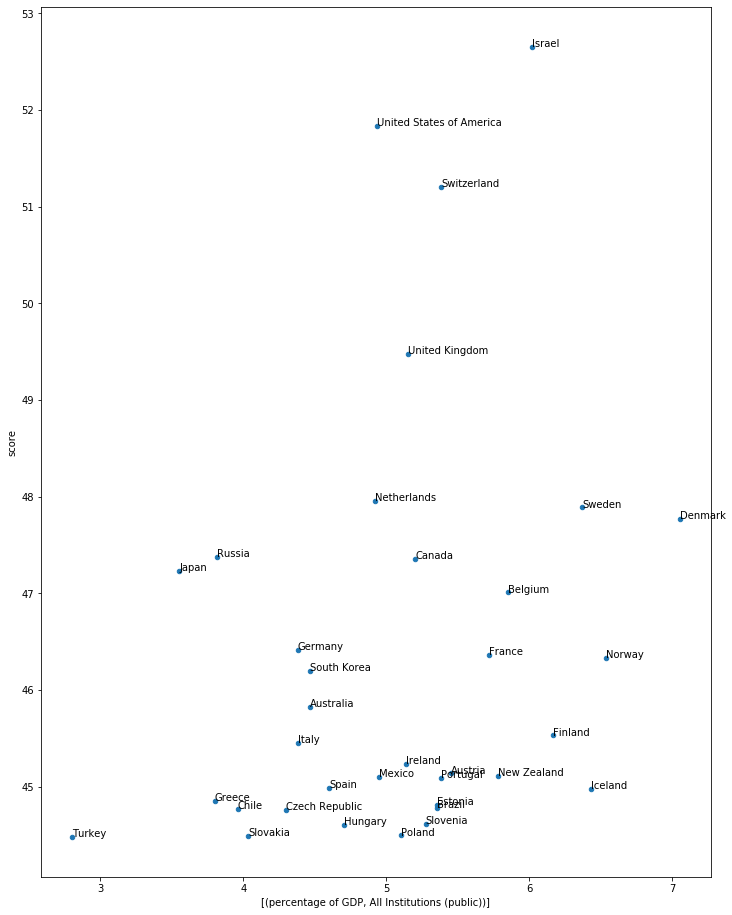

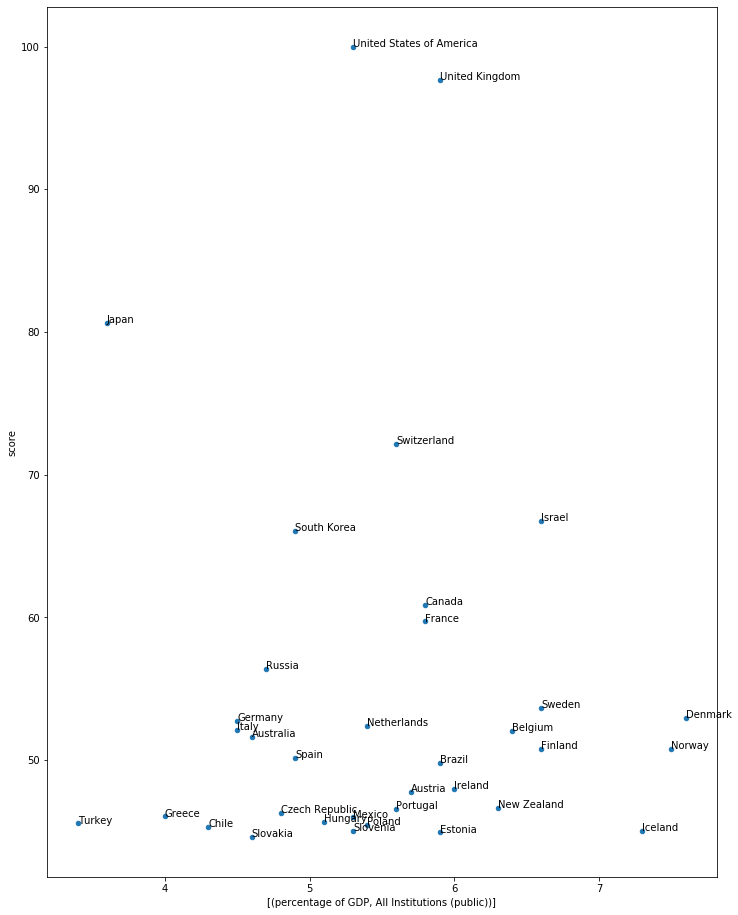

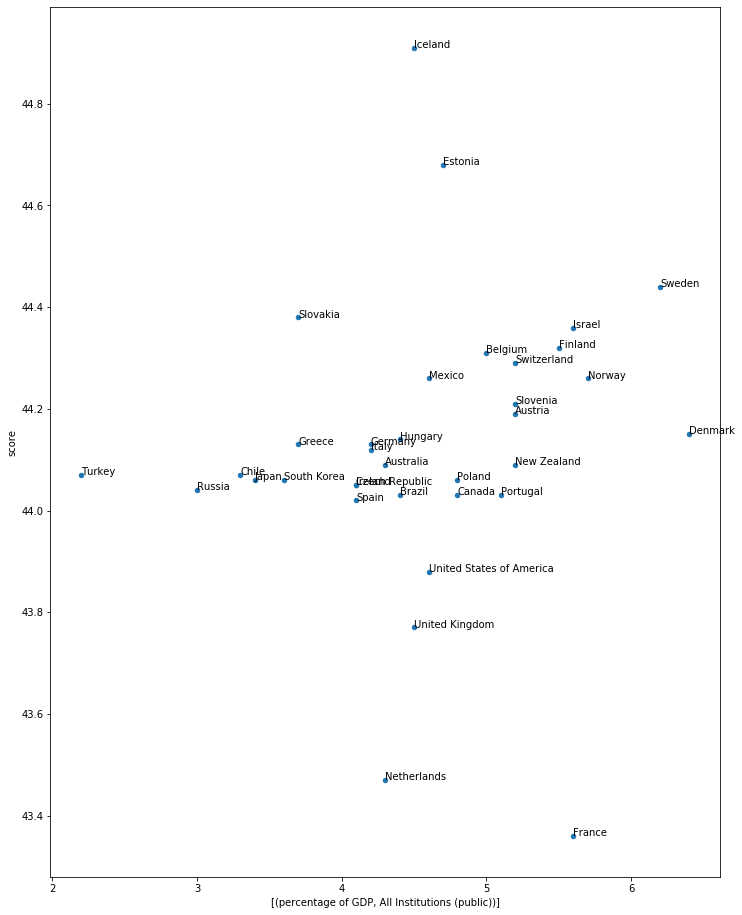

In [9]:
cwur2 = cwur_exp.groupby("country").mean()
cwur3 = cwur_exp.groupby("country").max()
cwur4 = cwur_exp.groupby("country").min()

fig, ax = plt.subplots()
cwur2.plot([('percentage of GDP', 'All Institutions (public)')], "score", kind="scatter",
             figsize = (12,16), ax=ax)
for k, v in cwur2.iterrows():
    x = v[('percentage of GDP', 'All Institutions (public)')]
    y = v["score"]
    ax.annotate(k, (x,y))
    
plt.show()

fig, ax = plt.subplots()
cwur3.plot([('percentage of GDP', 'All Institutions (public)')], "score", kind="scatter",
             figsize = (12,16), ax=ax)
for k, v in cwur3.iterrows():
    x = v[('percentage of GDP', 'All Institutions (public)')]
    y = v["score"]
    ax.annotate(k, (x,y))
plt.show()

fig, ax = plt.subplots()
cwur4.plot([('percentage of GDP', 'All Institutions (public)')], "score", kind="scatter",
             figsize = (12,16), ax=ax)
for k, v in cwur4.iterrows():
    x = v[('percentage of GDP', 'All Institutions (public)')]
    y = v["score"]
    ax.annotate(k, (x,y))
plt.show()

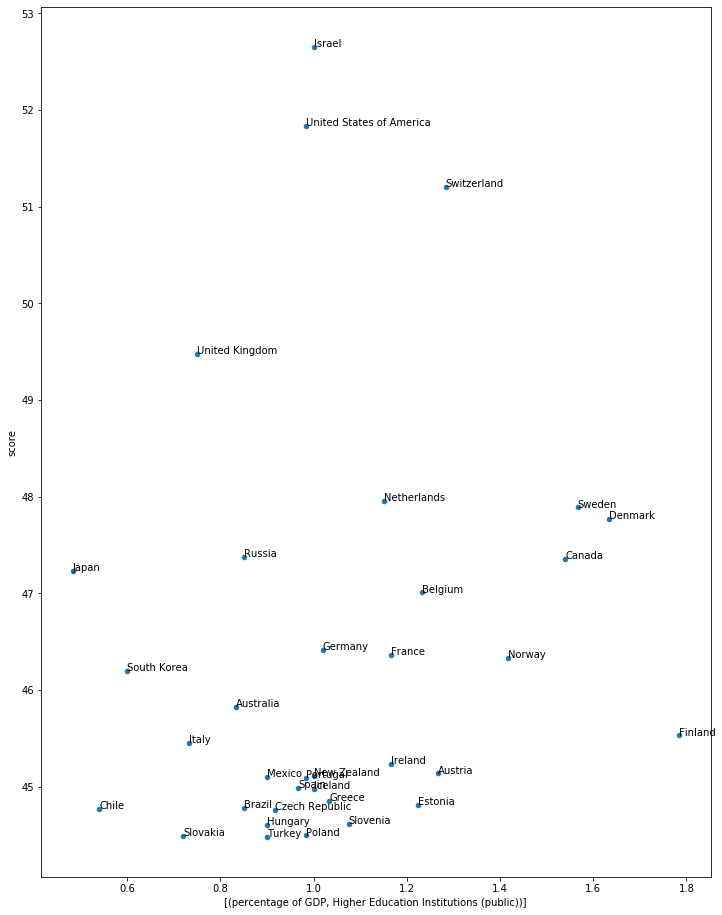

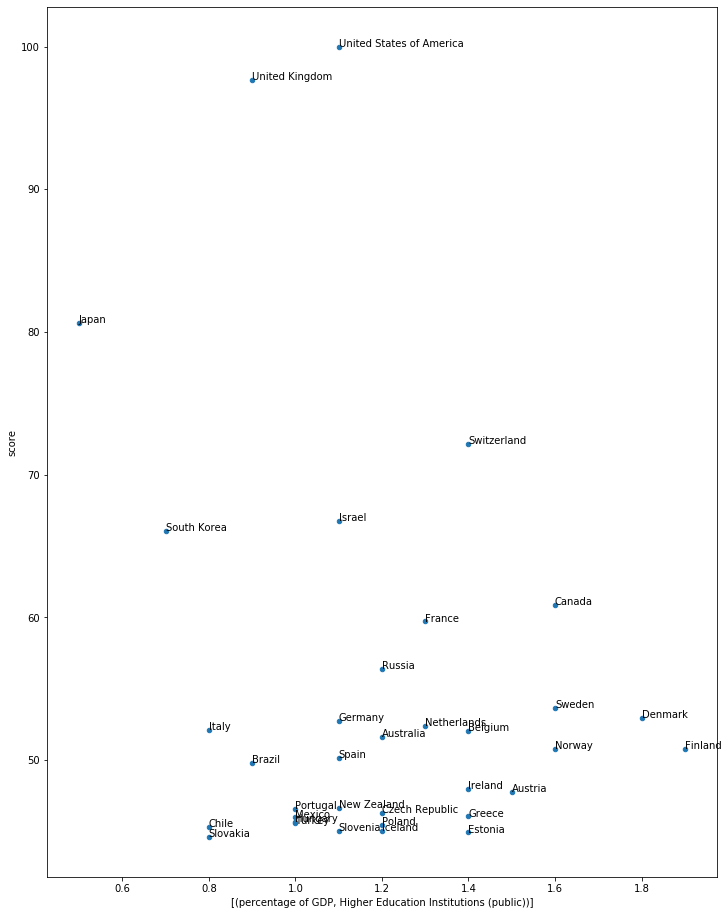

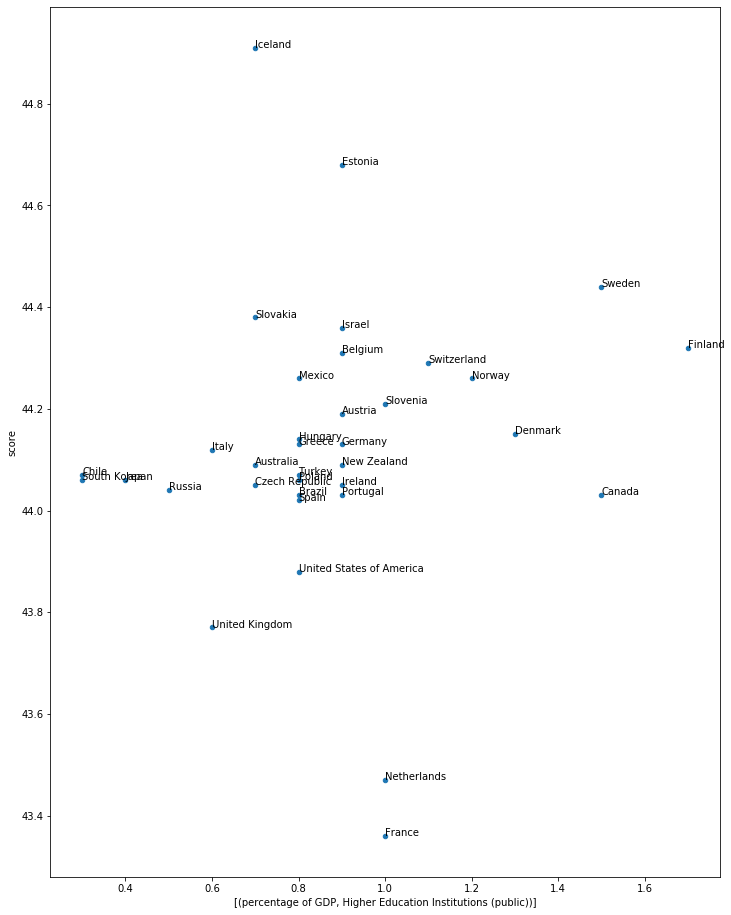

In [10]:
cwur2 = cwur_exp.groupby("country").mean()
fig, ax = plt.subplots()
cwur2.plot([('percentage of GDP', 'Higher Education Institutions (public)')], "score", kind="scatter",
             figsize = (12,16), ax=ax)
for k, v in cwur2.iterrows():
    x = v[('percentage of GDP', 'Higher Education Institutions (public)')]
    y = v["score"]
    ax.annotate(k, (x,y))
plt.show()

fig, ax = plt.subplots()
cwur3.plot([('percentage of GDP', 'Higher Education Institutions (public)')], "score", kind="scatter",
             figsize = (12,16), ax=ax)
for k, v in cwur3.iterrows():
    x = v[('percentage of GDP', 'Higher Education Institutions (public)')]
    y = v["score"]
    ax.annotate(k, (x,y))
plt.show()

fig, ax = plt.subplots()
cwur4.plot([('percentage of GDP', 'Higher Education Institutions (public)')], "score", kind="scatter",
             figsize = (12,16), ax=ax)
for k, v in cwur4.iterrows():
    x = v[('percentage of GDP', 'Higher Education Institutions (public)')]
    y = v["score"]
    ax.annotate(k, (x,y))
plt.show()

                                                    (percentage of GDP, Elementary and Secondary Institutions (public))  \
(percentage of GDP, Elementary and Secondary In...                                           1.000000                     
(percentage of GDP, All Institutions (public))                                               0.918623                     
(percentage of GDP, Higher Education Institutio...                                           0.503599                     
world_rank                                                                                  -0.413105                     
national_rank                                                                               -0.054077                     
quality_of_education                                                                        -0.060375                     
alumni_employment                                                                           -0.239181                     
quality_of_facul

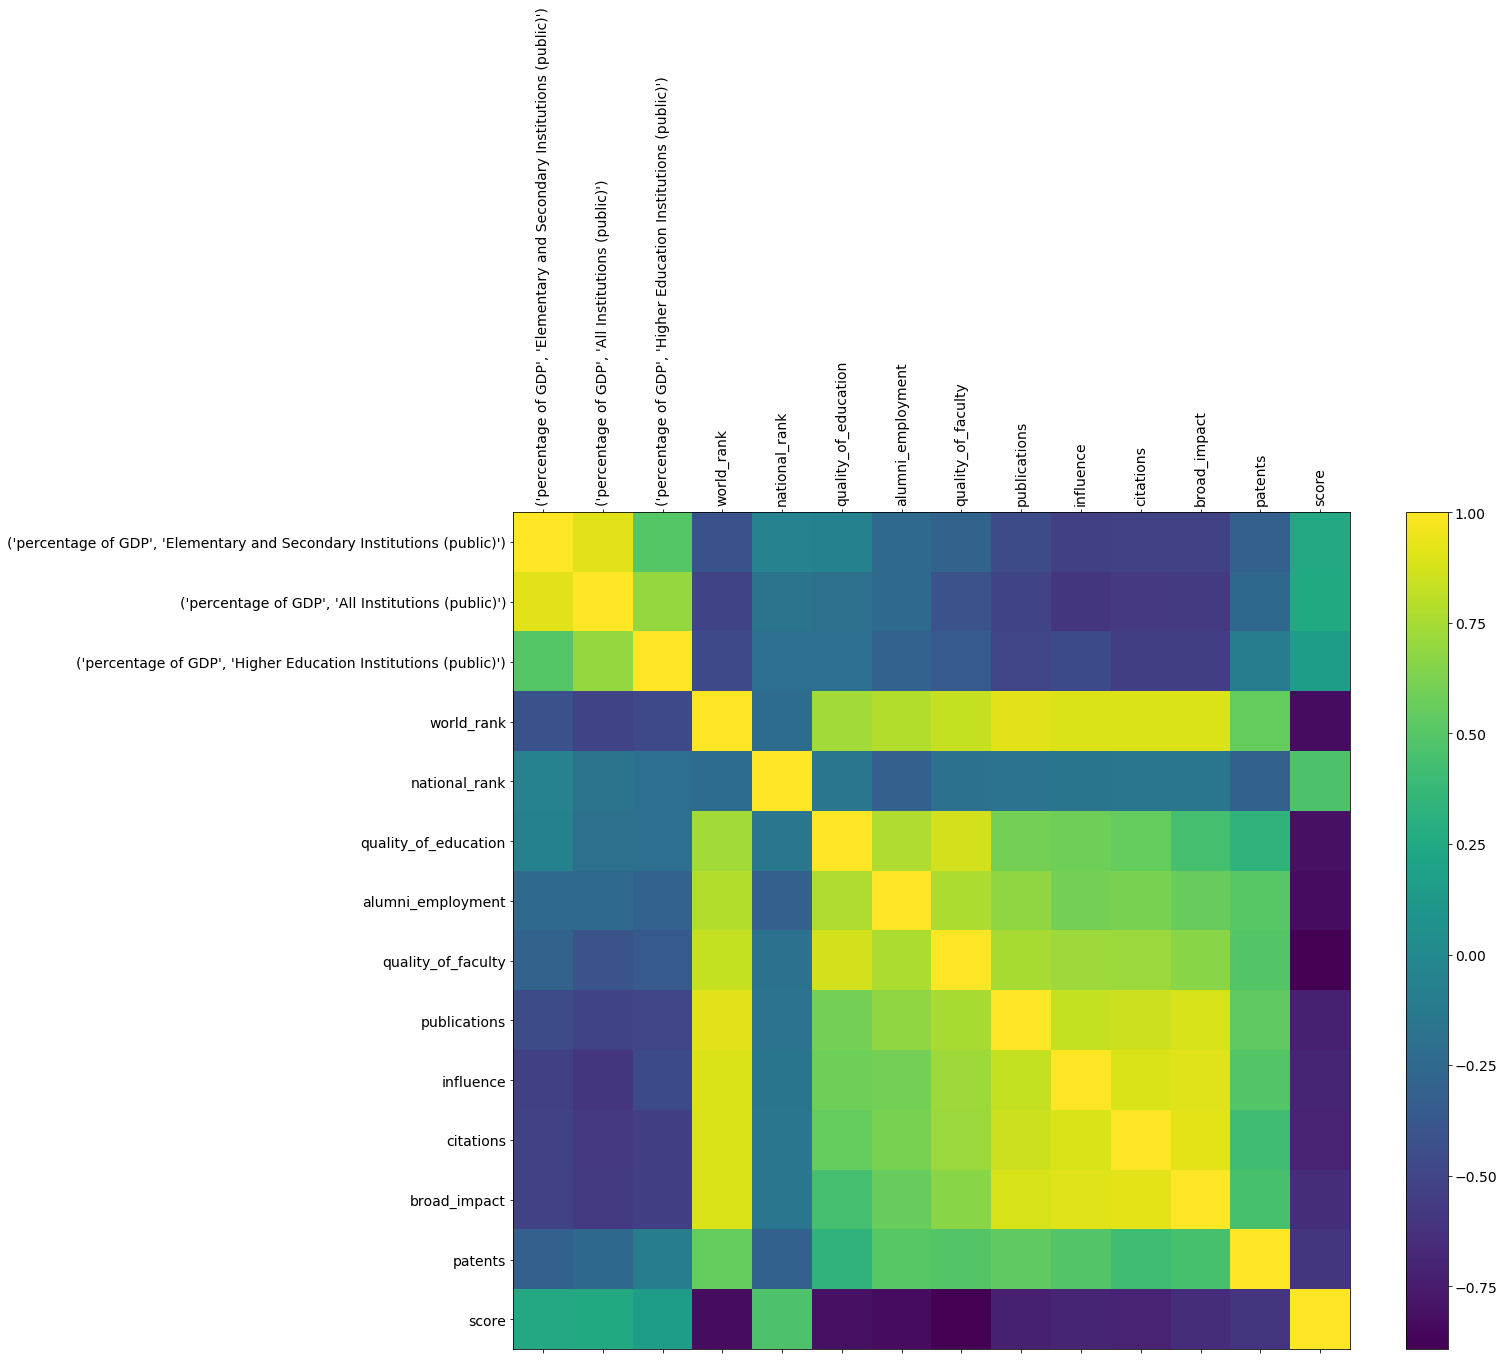

In [39]:
#Heatmap
print(cwur2.corr())

fig1 = plt.figure(figsize=(20, 15))
plt.matshow(cwur2.corr(), fignum=fig1.number)
plt.xticks(range(cwur2.shape[1]), cwur2.columns, fontsize=14, rotation=90)
plt.yticks(range(cwur2.shape[1]), cwur2.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

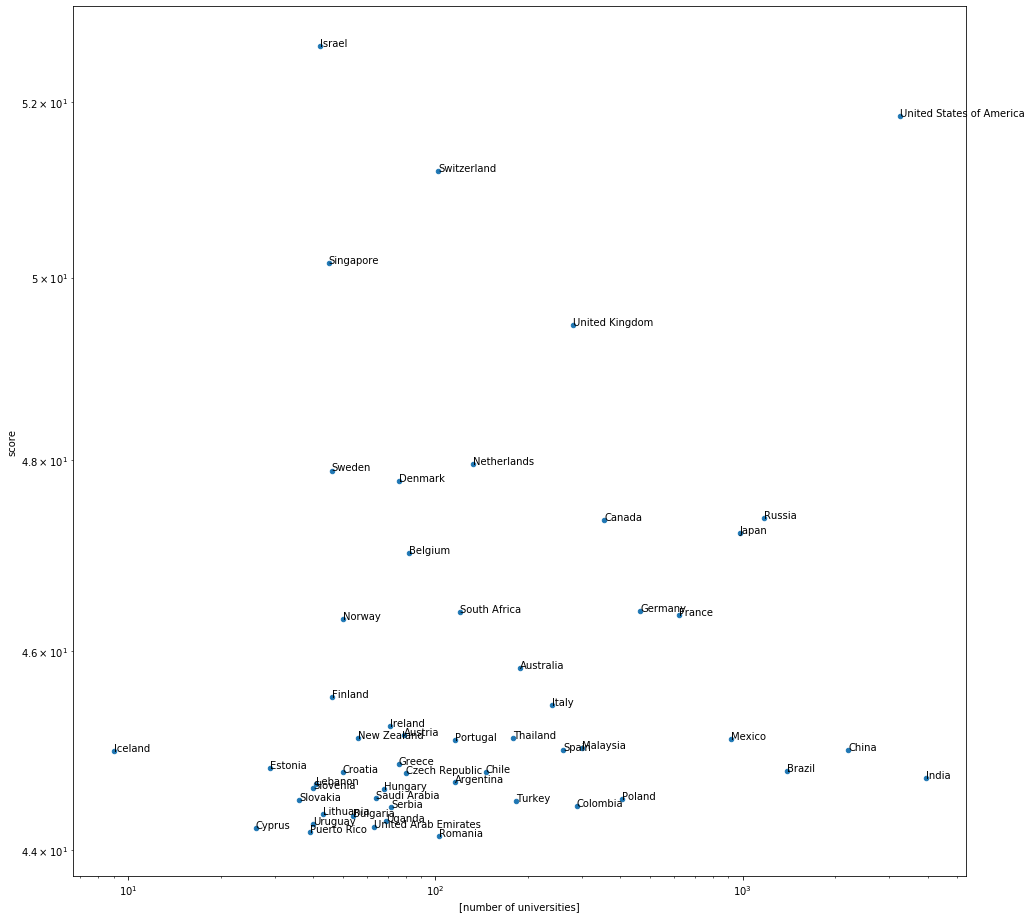

In [11]:
cwur_inh2 = cwur_inh.groupby("country").mean()
fig, ax = plt.subplots()
cwur_inh2.plot([('number of universities')], "score", kind="scatter",
             figsize = (16,16), ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

for k, v in cwur_inh2.iterrows():
    x = v['number of universities']
    y = v["score"]
    ax.annotate(k, (x,y))

plt.show()

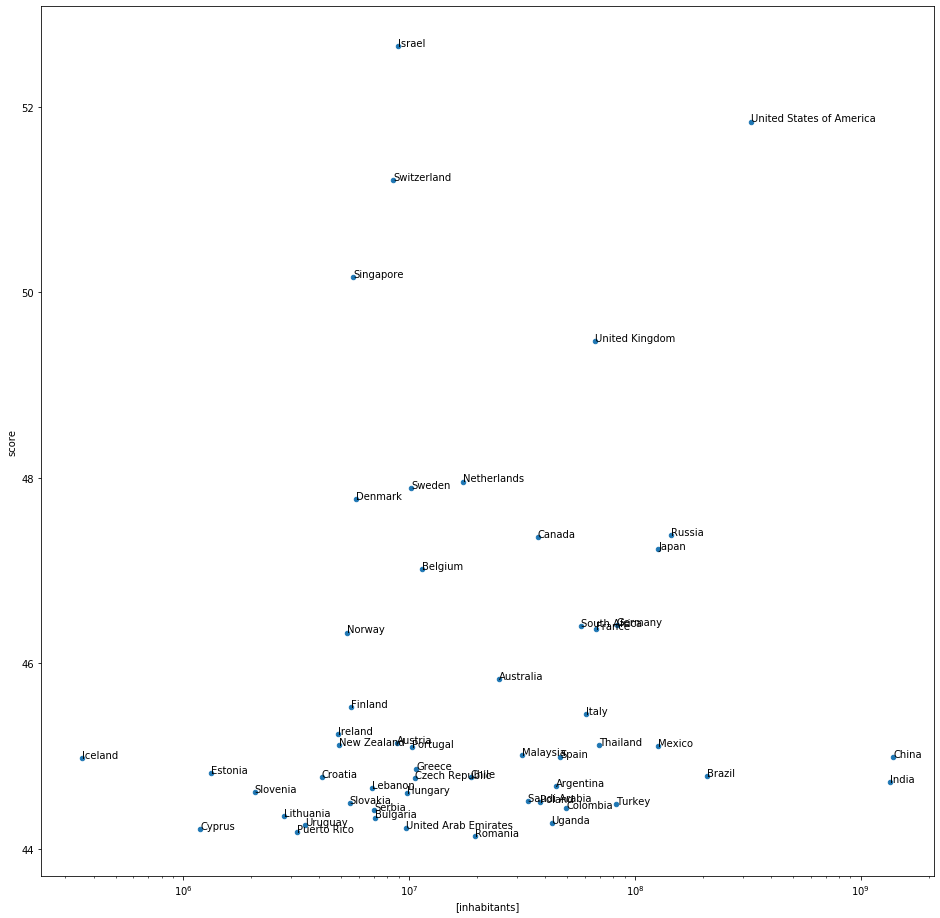

In [12]:
cwur_inh2 = cwur_inh.groupby("country").mean()
fig, ax = plt.subplots()
cwur_inh2.plot([('inhabitants')], "score", kind="scatter",
             figsize = (16,16), ax=ax)
ax.set_xscale('log')
#ax.set_yscale('log')


for k, v in cwur_inh2.iterrows():
    x = v['inhabitants']
    y = v["score"]
    ax.annotate(k, (x,y))

plt.show()

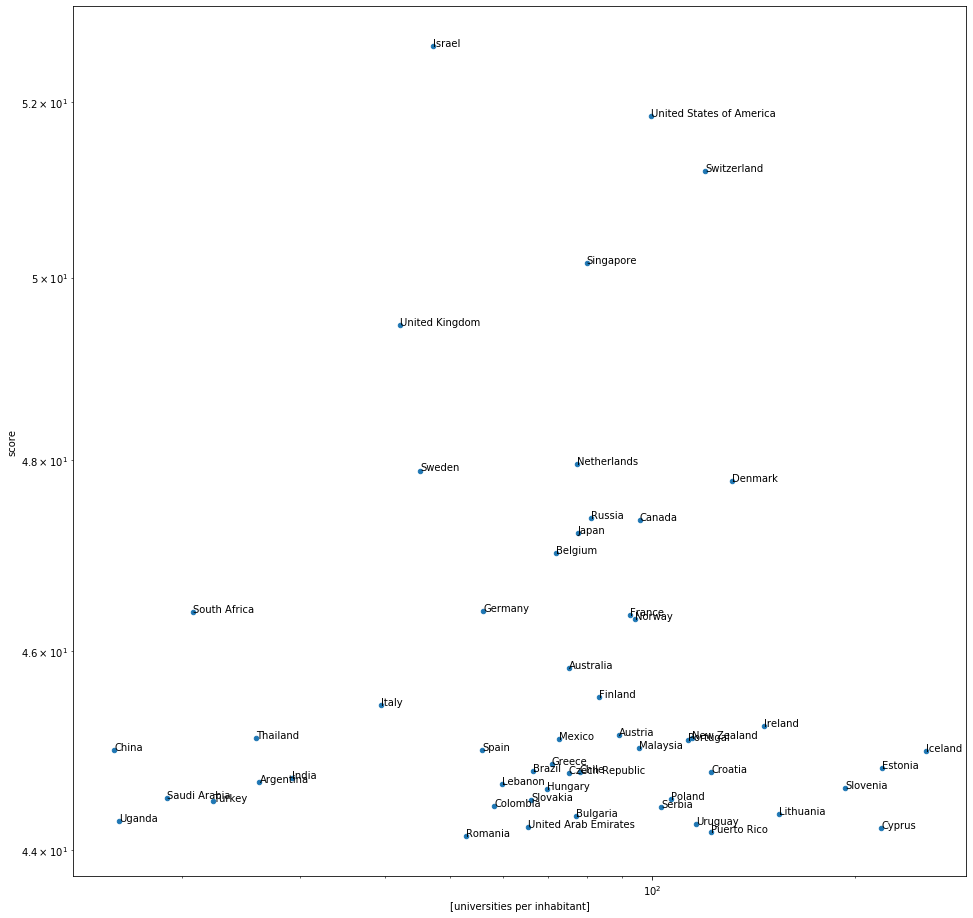

In [46]:
cwur_inh2 = cwur_inh.groupby("country").mean()
fig, ax = plt.subplots()

cwur_inh2.plot([('universities per inhabitant')], "score", kind="scatter",
             figsize = (16,16), ax=ax)

ax.set_xscale('log')
ax.set_yscale('log')

for k, v in cwur_inh2.iterrows():
    x = v['universities per inhabitant']
    y = v["score"]
    ax.annotate(k, (x,y))

plt.show()

                                 inhabitants  number of universities  \
inhabitants                         1.000000                0.828656   
number of universities              0.828656                1.000000   
world_rank                          0.047084               -0.067763   
national_rank                       0.351385                0.599893   
quality_of_education                0.064838               -0.084566   
alumni_employment                  -0.114499               -0.199200   
quality_of_faculty                  0.096733               -0.040981   
...                                      ...                     ...   
citations                           0.142655                0.023538   
broad_impact                        0.101578                0.023491   
patents                            -0.030795               -0.121139   
score                              -0.022121                0.184024   
universities per inhabitant        -0.290075               -0.21

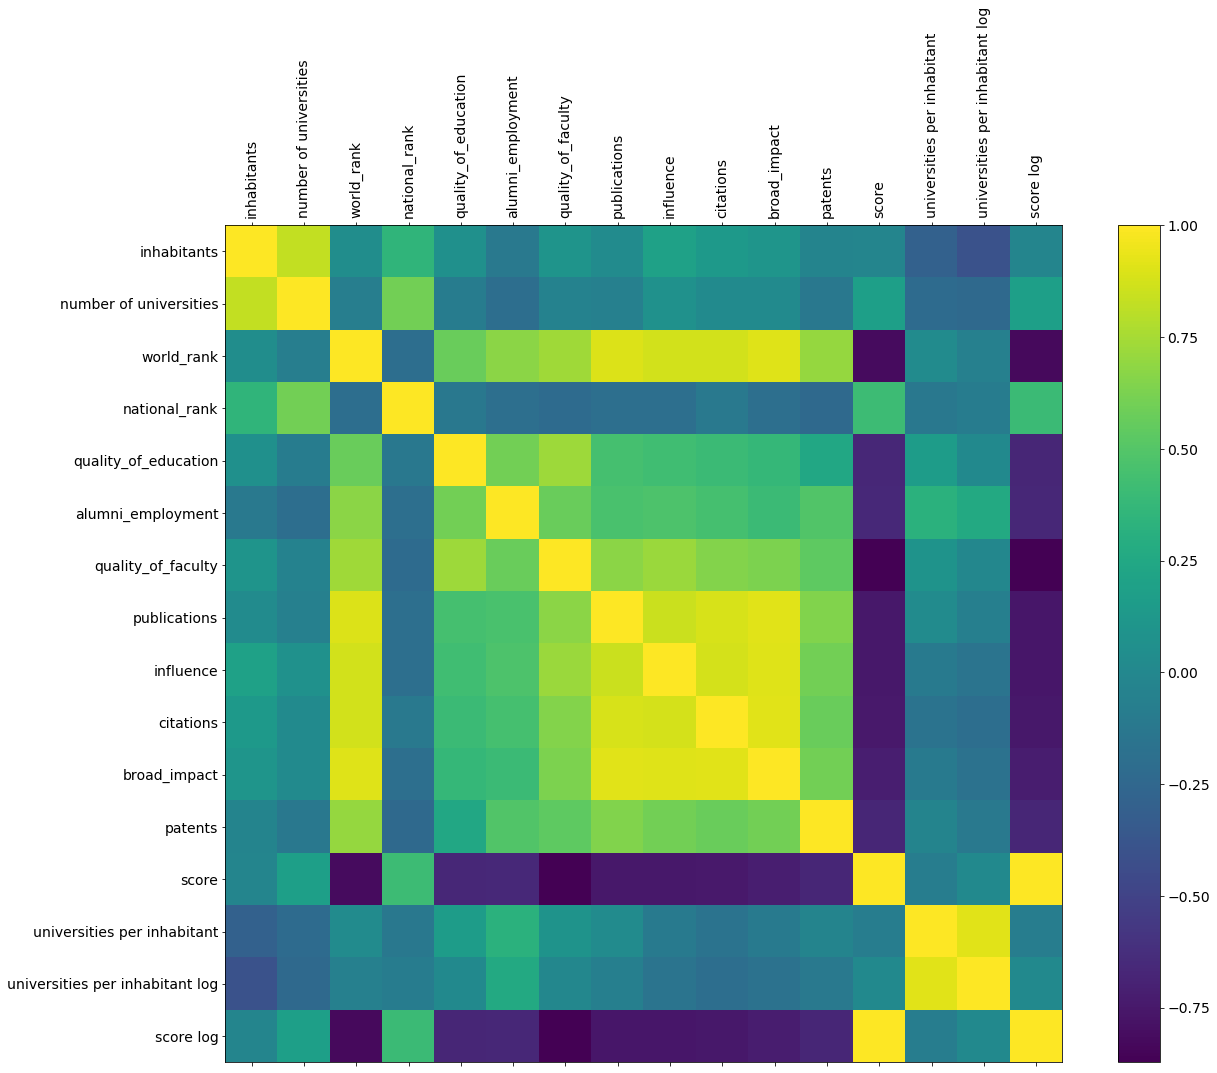

In [47]:
#Heatmap
cwur_inh2["universities per inhabitant log"] = np.log(cwur_inh2["universities per inhabitant"])
cwur_inh2["score log"] = np.log(cwur_inh2["score"])

print(cwur_inh2.corr())
fig1 = plt.figure(figsize=(20, 15))
plt.matshow(cwur_inh2.corr(), fignum=fig1.number)
plt.xticks(range(cwur_inh2.shape[1]), cwur_inh2.columns, fontsize=14, rotation=90)
plt.yticks(range(cwur_inh2.shape[1]), cwur_inh2.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

## Step 3: Model the data